<a href="https://colab.research.google.com/github/Jojocko/NLP-projects-/blob/main/jo_supply_chain_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 100)

df = pd.read_csv('/content/drive/My Drive/Datasets NLP/dataset_supplychain.csv')
df.head(5)



,Commentaire,star,date,client,reponse,source,company,langage,cleaned_words,cleaned_lemma,Sentiment
0,"Colis commandé mardi 28 fevrier 23 , livraison le jeudi 02 mars 23 produit non recu au 7 mars 23Au prix du colis, amazon des incapables et chronopost pareilService client qui veule que je patiente une journée de plusLe colis est introuvable et meme chronopost renvoie la balle a amazonAmazon veut pas me renvoyé un autre article alors que ca fait une semaine que j'attend ce colis",1,2023-03-07,Toto,NaN,TrustPilot,Amazon,fr,colis commandé mardi fevrier livraison jeudi mars produit non recu mars 23au prix colis amazon incapables chronopost pareilservice client veule patiente journée plusle colis introuvable chronopost renvoie balle amazonamazon veut renvoyé article ca semaine attend colis,colis commander mardi fevrier livraison jeudi mars produit non recu mars 23au prix colis amazon incapable chronopost pareilservic client veule patient journée plusle colis introuvable chronopost renvoyer balle amazonamazon vouloir renvoyer article ca semaine attendre colis,__label__NEGATIVE
1,Amazon avec sa politique de retour est la pire que j ai vu contrairement a d autre site marchand.Montre défectueuse rendu il y a 10 jours et toujours pas de remboursement ce sont des méthodes de voleurs et de voyous et au téléphone il n y a que des incompétents et personne n a la même version de jours de retourAmazon c est a fuir dernière fois que je commande chez eux la concurrence est plus professionnelle.,1,2023-03-07,nasri eddine,NaN,TrustPilot,Amazon,fr,amazon politique pire contrairement site marchand.montre défectueuse rendu jours remboursement méthodes voleurs voyous téléphone incompétents version jours retouramazon fuir dernière fois commande concurrence professionnelle,amazon politique pire contrairement site marchand.montr défectueux rendre jour remboursement méthode voleur voyou téléphone incompétent version jour retouramazon fuir dernier fois commande concurrence professionnel,__label__NEGATIVE
2,"Dieu sait que j'en connais des déboires avec les sites marchands. Amazon n'échappe pas à la règle, il m'arrive d'expérimenter quelques désagréments. CEPENDANT, je n'ai rien à redire sur le service client d'Amazon. Les agents sont vraiment tournés vers la satisfaction du client. Ca change des autres commerces. Etant Prime, les livraisons rapides et retours gratuits sont très appréciables. Les autres commerces devraient s'en inspirer !!!",4,2023-03-07,Amandine,NaN,TrustPilot,Amazon,fr,dieu connais déboires sites marchands amazon échappe règle arrive expérimenter désagréments rien redire service client amazon agents vraiment tournés satisfaction client ca change commerces prime livraisons rapides retours gratuits appréciables commerces devraient inspirer,dieu connaître déboire site marchand amazon échapper règle arriver expérimenter désagrément rien redire service client amazon agent vraiment tourner satisfaction client ca changer commerce prime livraison rapide retour gratuit appréciable commerce devoir inspirer,__label__POSITIVE
3,"Nul, preleve une commande que je n'ai jamais reçu et le service client laisse des blancs jusqu'à ce qu'on raccroche et ça sur plusieurs appel. Donc amazone ma volé Dernière commande pour moi passé chez eux, ça m'apprendras à vouloir acheter chez les americains",1,2023-03-07,Bob Brico,NaN,TrustPilot,Amazon,fr,preleve commande jamais reçu service client laisse blancs jusqu' raccroche appel amazone volé dernière commande passé apprendras vouloir acheter americains,prelev commande jamais recevoir service client laisse blanc jusque raccrocher appel amazone voler dernier commande passer apprendre vouloir acheter americain,__label__NEGATIVE
4,Colis soit disant livré mais jamais reçu donc perdu non remboursé et falsification du bon de livraison soit disant signé par mes soins (Signature en majuscule) MDR je ne signe jamais de documents en majuscule ils moquent de leurs clients je vais résilier mon aboment Amazon Prime et en finir ave

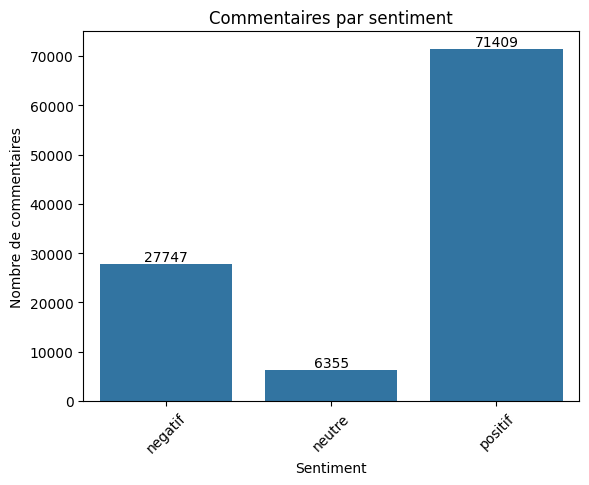

In [18]:
df = df.drop(['client', 'langage', 'reponse'], axis=1)
df.rename(columns={'Sentiment': 'sentiment', 'Commentaire': 'commentaire'}, inplace=True)
df['sentiment'] = df['sentiment'].replace({'__label__POSITIVE': 'positif', '__label__NEGATIVE': 'negatif', '__label__NEUTRAL': 'neutre'})
df['date'] = df['date'].fillna(method="ffill")
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year # pour visualiser par année et non par jour/mois/année

sentiment = df.groupby('sentiment')['commentaire'].count()

sns.barplot(x=sentiment.index, y=sentiment.values)
plt.xlabel('Sentiment')
plt.ylabel('Nombre de commentaires')
plt.title('Commentaires par sentiment')
plt.xticks(rotation=45)
for index, value in enumerate(sentiment.values):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

Les résultats montrent plus de commentaires positifs (4, 5 étoiles). Nous pourrious donc à la fois analyser le contenu des commentaires positifs pour savoir ce qui influence la satisfaction client et les commentaires négatifs pour connaitre les points à améliorer.

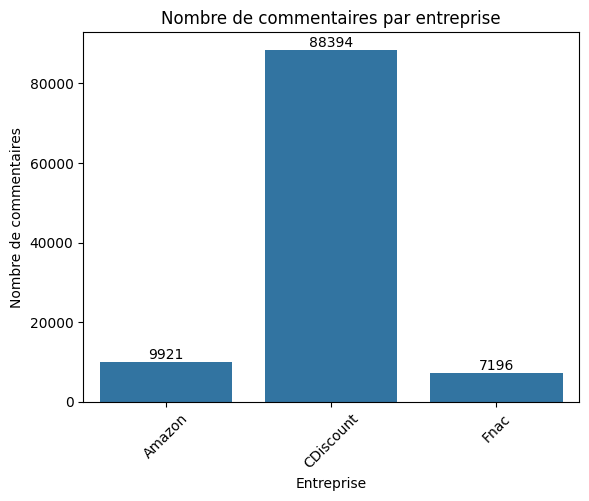

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Nb de commentaires par entreprise

nb_commentaires = df.groupby('company')['commentaire'].count() # nb de commentaires par entreprise

sns.barplot(x=nb_commentaires.index, y=nb_commentaires.values)
plt.xlabel('Entreprise')
plt.ylabel('Nombre de commentaires')
plt.title('Nombre de commentaires par entreprise')
plt.xticks(rotation=45)
for index, value in enumerate(nb_commentaires.values):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()




On observe que le dataset n'est pas représentatif, avec beaucoup plus de commentaires pour CDiscount.

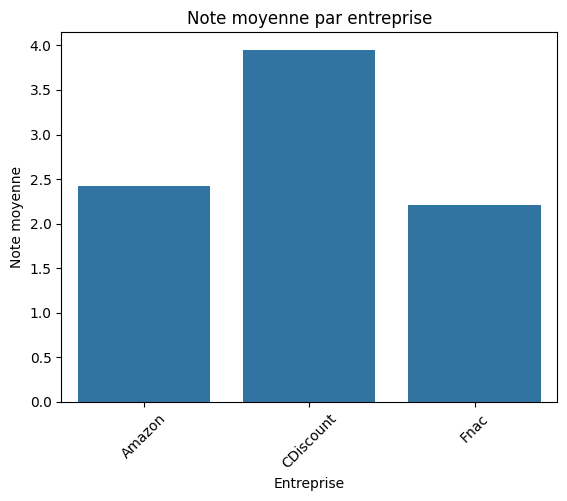

In [21]:
# Note moyenne par entreprise

notes = df.groupby('company').agg({'star': 'mean'}) # répartition des notes par entreprise

sns.barplot(x=notes.index, y=notes['star'])
plt.xlabel('Entreprise')
plt.ylabel('Note moyenne')
plt.title('Note moyenne par entreprise')
plt.xticks(rotation=45)
plt.show()



Sans rentrer dans les détails chronologiques, CDiscount est mieux notée que Fnac et Amazon sur une période d'une dizaine d'années.



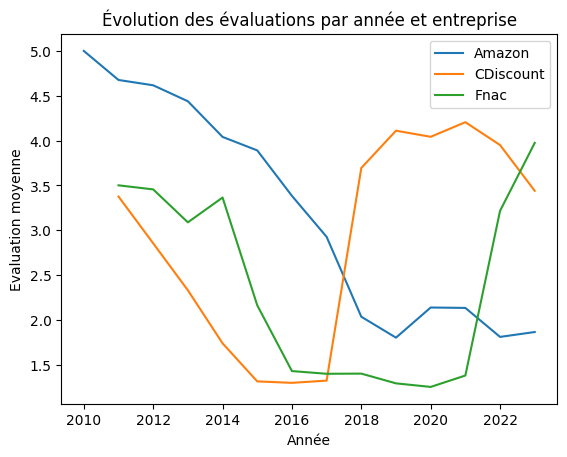

In [22]:
# Évolution des évaluations

evolution = df.groupby([df['date'].dt.year, 'company']).agg({'star': 'mean'}) # évolution des notes par année et entreprise

for company in evolution['star'].unstack().columns:
    plt.plot(evolution['star'].unstack()[company], label=company)

plt.xlabel('Année')
plt.ylabel('Evaluation moyenne')
plt.title('Évolution des évaluations par année et entreprise')
plt.legend()
plt.show()


L'analyse chronologique montre que pour CDiscount, la note moyenne a escaladé en 2017, alors que la tendance générale pour Amazon est à la baisse et que pour Fnac, la hausse des notes débute en 2021. Il serait alors intéressant de voir si la hausse des notes correspond à une hausse ou baisse du nombre de commentaires.


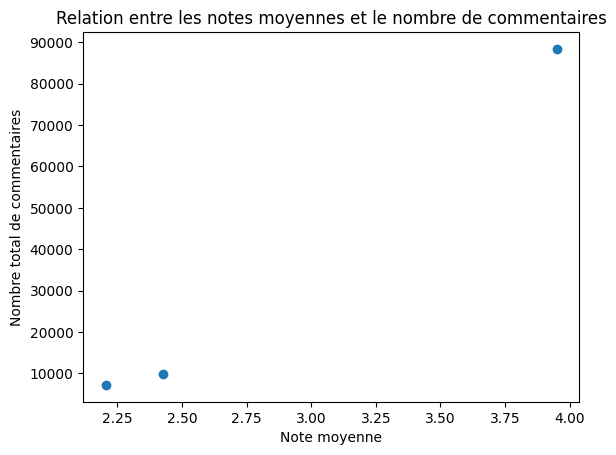

In [23]:
# Relation entre nb de commentaires et notes moyennes

plt.figure
plt.scatter(notes['star'], nb_commentaires.values)

plt.xlabel('Note moyenne')
plt.ylabel('Nombre total de commentaires')
plt.title('Relation entre les notes moyennes et le nombre de commentaires')

plt.show()


Il est clair que pour CDiscount, plus le nombre de commentaires augmente, plus la note moyenne augmente aussi.


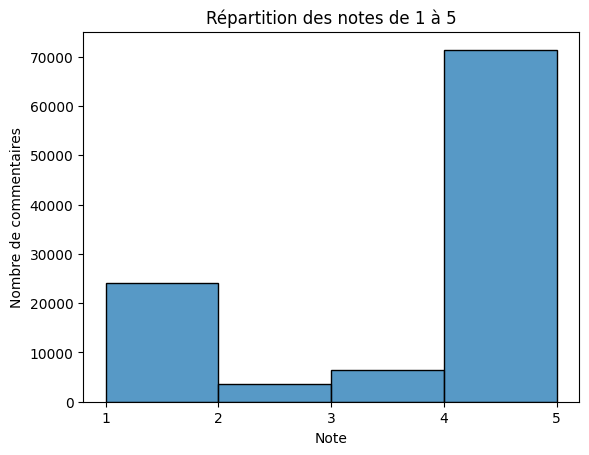

In [24]:
# Répartition des notes

plt.figure
sns.histplot(data=df, x='star', binwidth=1, kde=False)

plt.xlabel('Note')
plt.ylabel('Nombre de commentaires')
plt.title('Répartition des notes de 1 à 5')
plt.xticks(range(1, 6))
plt.show()


Les notes 2 et 3 sont sous-représentés, indiquant que les internautes écrivent des commentaires pour dire qu'ils sont soit très satisfaits ou soit très insatisfaits.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


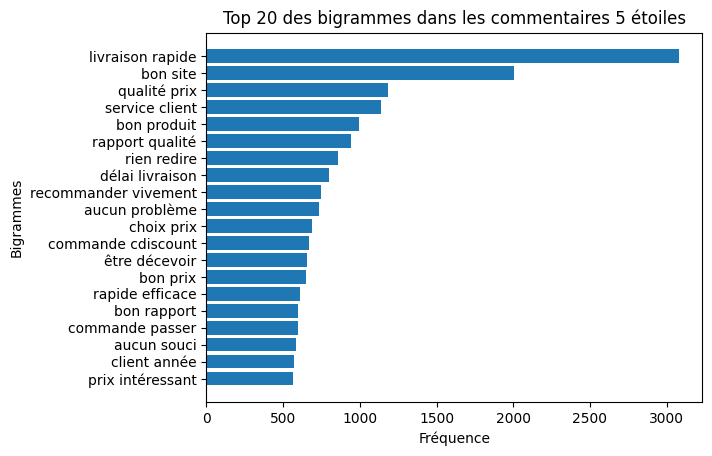

In [31]:
# n-grammes

from nltk import bigrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import nltk

import nltk
nltk.download('stopwords')
nltk.download('punkt')


stop_words = set(stopwords.words('french'))

adverbes = {'très', 'beaucoup', 'bien', 'mal', 'ainsi', 'aussi', 'toujours', 'jamais', 'vraiment', 'particulièrement', 'souvent', 'peu', 'plutôt', 'rarement', 'généralement', 'complètement', 'absolument', 'sérieusement', 'légèrement',
    'fréquemment', 'énormément', 'directement', 'parfaitement', 'principalement', 'naturellement', 'exactement',
    'facilement', 'évidemment', 'fondamentalement', 'heureusement', 'malheureusement'}

stop_words.update(adverbes)

# Filtrage des commentaires à 5 étoiles
df_5_stars = df[df['star'] == 5]
text_5_stars = ' '.join(df_5_stars['cleaned_lemma'].dropna())

# Tokenisation et suppresion des stopwords
words = [word for word in word_tokenize(text_5_stars.lower()) if word.isalpha() and word not in stop_words]

# Bigramme
bigrammes = list(bigrams(words))
bigramme_freq = Counter(bigrammes)
top_20_bigrammes = bigramme_freq.most_common(20)

bigrammes_labels = [' '.join(bigram) for bigram, freq in top_20_bigrammes]
frequences = [freq for bigram, freq in top_20_bigrammes]

plt.figure
plt.barh(bigrammes_labels, frequences)
plt.xlabel('Fréquence')
plt.ylabel('Bigrammes')
plt.title('Top 20 des bigrammes dans les commentaires 5 étoiles')
plt.gca().invert_yaxis()
plt.show()


Ce bigramme indique que la note de 5 étoiles est largement influencée par la livraison rapide.

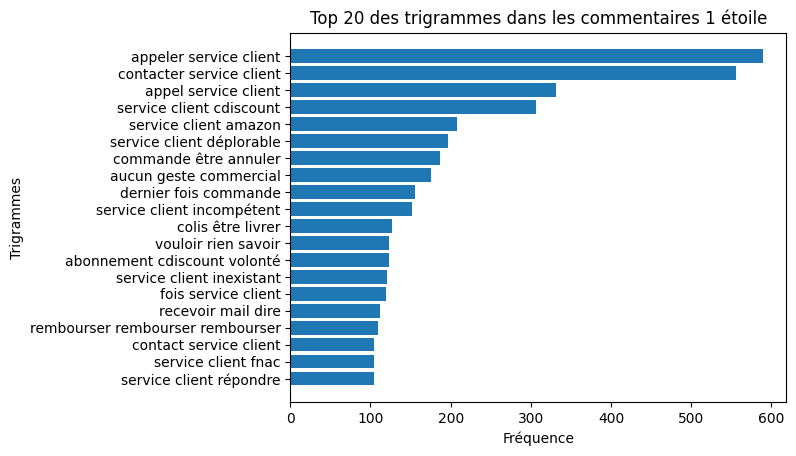

In [32]:
from nltk import trigrams

# Filtrage des commentaires à 1 étoile
df_1_stars = df[df['star'] == 1]
text_1_stars = ' '.join(df_1_stars['cleaned_lemma'].dropna())

# Tokenisation et suppression des stopwords
words = [word for word in word_tokenize(text_1_stars.lower()) if word.isalpha() and word not in stop_words]

# Trigramme
trigrammes = list(trigrams(words))
trigramme_freq = Counter(trigrammes)
top_20_trigrammes = trigramme_freq.most_common(20)
trigrammes_labels = [' '.join(trigram) for trigram, freq in top_20_trigrammes]
frequences = [freq for trigram, freq in top_20_trigrammes]

plt.figure
plt.barh(trigrammes_labels, frequences)
plt.xlabel('Fréquence')
plt.ylabel('Trigrammes')
plt.title('Top 20 des trigrammes dans les commentaires 1 étoile')
plt.gca().invert_yaxis()
plt.show()



Ce bigramme indique une évaluation négative du service client, que ce soit chez Fnac, Amazon ou CDiscount.

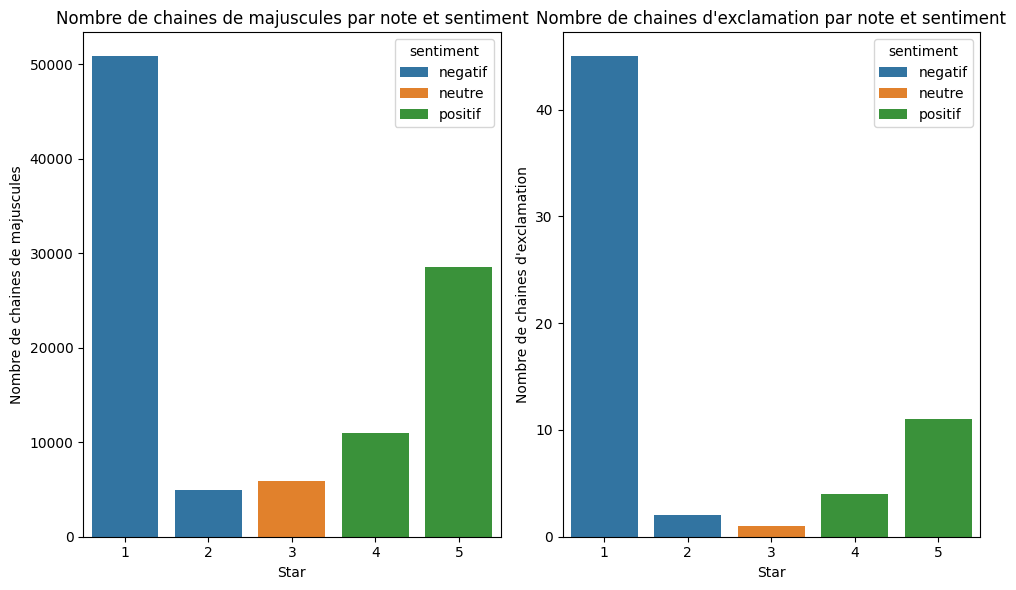

In [27]:
# Extraction des exclamations et majuscules
import re

def findCAPSLOCK(tweet):
    r = re.compile(r"[A-Z]")
    capslock = r.findall(tweet)
    return len(capslock)

def find_chain_CAPSLOCK(tweet):
    r = re.compile(r"[A-Z]{2,}")
    capslock = r.findall(tweet)
    return len(capslock)

def find_exclamation(tweet):
    r = re.compile(r"\!")
    exclamation = r.findall(tweet)
    return len(exclamation)

def find_chain_exclamation(tweet):
    r = re.compile(r"(\! ){2,}")
    exclamation = r.findall(tweet)
    return len(exclamation)

df['capslock'] = df.commentaire.apply(lambda x: findCAPSLOCK(str(x)))
df['chain_capslock'] = df.commentaire.apply(lambda x: find_chain_CAPSLOCK(str(x)))
df['exclamation'] = df.commentaire.apply(lambda x: find_exclamation(str(x)))
df['chain_exclamation'] = df.commentaire.apply(lambda x: find_chain_exclamation(str(x)))

# Grouper les données par 'star' et 'sentiment', puis calculer la somme
grouped_data = df.groupby(['star', 'sentiment']).agg({
    'chain_capslock': 'sum',
    'chain_exclamation': 'sum'
}).reset_index()

# Création des graphiques
plt.figure(figsize=(10, 6))

# Graphique pour chain_capslock
plt.subplot(1, 2, 1)
sns.barplot(data=grouped_data, x='star', y='chain_capslock', hue='sentiment')
plt.title('Nombre de chaines de majuscules par note et sentiment')
plt.xlabel('Star')
plt.ylabel('Nombre de chaines de majuscules')

# Graphique pour chain_exclamation
plt.subplot(1, 2, 2)
sns.barplot(data=grouped_data, x='star', y='chain_exclamation', hue='sentiment')
plt.title("Nombre de chaines d'exclamation par note et sentiment")
plt.xlabel('Star')
plt.ylabel("Nombre de chaines d'exclamation")

plt.tight_layout()
plt.show()



Les internautes semblent exprimer leurs sentiments (positifs et négatifs) davantage avec des majuscules que des points d'exclamation.


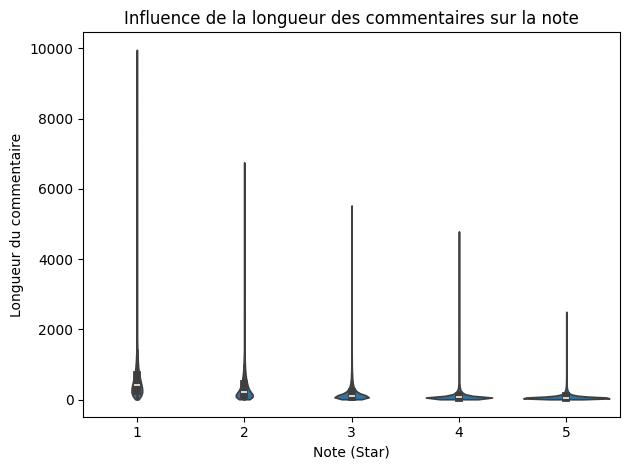

In [28]:
# Influence de l'impact de la longueur d'un commentaire sur la note.

df['length'] = df['commentaire'].str.len()

fig, ax = plt.subplots()
sns.violinplot(x="star", y="length", data=df, ax=ax, cut=0)
ax.set_title('Influence de la longueur des commentaires sur la note')
ax.set_xlabel('Note (Star)')
ax.set_ylabel('Longueur du commentaire')
plt.tight_layout()
plt.show()



Les commentaires positifs (4, 5 étoiles) ont tendance à être plus concis.
Plus les notes deviennent négatives, plus les commentaires sont détaillés et représentent probablement des critiques explicatives données par des clients insatisfaits.

In [41]:
# Traitement des données
import re
import unicodedata
from nltk.tokenize import word_tokenize

def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn')

def preprocess_sentence(w):
    w = unicode_to_ascii(w.lower().strip()) # lower capitalized letters + retire les espaces en début et fin de string (phrases)
    w = re.sub(r"([?.!,¿])", r" \1 ", w) # ajout d'espaces autour des ponctuations pour les séparer des mots. eg: "he is a boy." => "he is a boy .
    w = re.sub(r'[" "]+', " ", w) # remplacement des séquences d'espaces multiples par un seul espace
    w = re.sub(r"[^a-zA-Z?.!]+", " ", w) # suppression de tout caractère qui n'est pas une lettre ou une ponctuation courante
    w = re.sub(r'\b\w{0,2}\b', '', w) # suppression des mots de moins de trois lettres.

    # remove stopword
    mots = word_tokenize(w.strip()) # tokénization en mots individuels
    mots = [mot for mot in mots if mot not in stop_words] # filtrage des mots vides
    return ' '.join(mots).strip() # reconstruction de la phrase sans les mots vides

df.cleaned_lemma = df.cleaned_lemma.apply(lambda x :preprocess_sentence(x))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


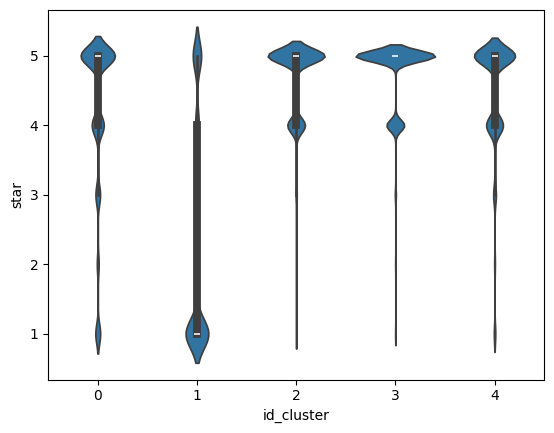

In [42]:
# 1ère tentative de clusters complètement déséquilibrés, autre méthode:
# Vectoriser avec TfidfVectorizer et non pas CountVectorizer , nb de termes min max , mix d'unigramme, bigramme et trigramme

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

min_df = 0.01  # Les termes doivent apparaître dans 1% des docs
max_df = 0.25  # Les termes ne doivent pas apparaître dans plus de 75% des documents

ngram_range = (1, 3)

stop_words_list = list(stop_words)

tfidf_vectorizer = TfidfVectorizer(min_df=min_df, max_df=max_df, ngram_range=ngram_range, stop_words=stop_words_list)

vec_reponses = tfidf_vectorizer.fit_transform(df.cleaned_lemma)

km = KMeans(n_clusters=5, random_state=42)
km.fit(vec_reponses)

data = pd.DataFrame({'star': df.star.values})
data['id_cluster'] = km.labels_
fig, ax = plt.subplots()
sns.violinplot(y="star", x="id_cluster", data=data, ax=ax)
plt.show()


In [43]:
# Importance relative des termes des clusters par rapport au corpus

tfidf_vectorizer = TfidfVectorizer(ngram_range=(3, 3))

tfidf_per_cluster = {}

for cluster_num in range(5):
    documents_in_cluster = df[km.labels_ == cluster_num].cleaned_lemma

    X_tfidf = tfidf_vectorizer.fit_transform(documents_in_cluster)

    scores = X_tfidf.toarray().mean(axis=0)
    terms = tfidf_vectorizer.get_feature_names_out()

    tfidf_per_cluster[cluster_num] = pd.DataFrame(data=scores, index=terms, columns=["TF-IDF"])
    tfidf_per_cluster[cluster_num] = tfidf_per_cluster[cluster_num].sort_values(by="TF-IDF", ascending=False)

    print(f"Top terms for cluster {cluster_num}:")
    print(tfidf_per_cluster[cluster_num].head(10))
    print("\n")

Top terms for cluster 0:
                                TF-IDF
passer recommander vivement   0.003485
excellent passer recommander  0.002788
rapport qualite prix          0.002427
delai livraison respecter     0.001582
parfait rien redire           0.001220
grand choix produit           0.000957
choix prix interessant        0.000930
large choix produit           0.000813
satisfaire achat cdiscount    0.000791
client annee satisfaire       0.000764


Top terms for cluster 1:
                              TF-IDF
contacter service client    0.001361
appeler service client      0.001295
annee commande cdiscount    0.001064
aucun probleme commande     0.000978
commande passer rapidement  0.000917
appel service client        0.000862
service client cdiscount    0.000810
aucun souci commande        0.000794
service client deplorable   0.000782
commande passer probleme    0.000782


Top terms for cluster 2:
                                   TF-IDF
satisfait service cdiscount      0.011439
c

Cluster 0: Satisfaction générale, respect des conditions, recommendation (+)

---

Cluster 1: Communication service client mitigée (-)

---

Custer 2: Satisfaction et fidélité clients CDiscount (+)

---

Cluster 3: Livraison : choix et rapidité (+)

---

Cluster 4: rapport qualité-prix des produits proposés


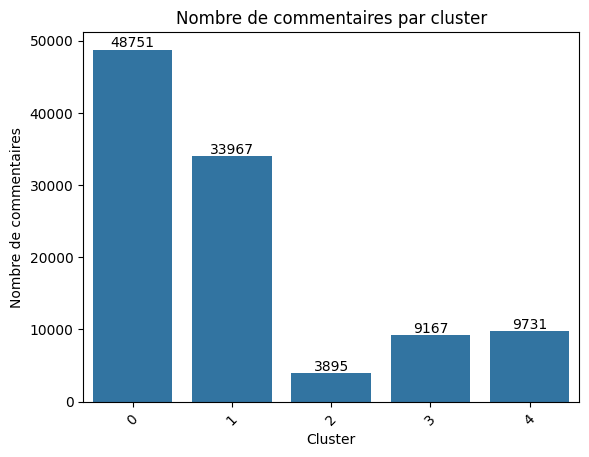

In [45]:
df['cluster'] = km.labels_

# Nb de commentaires par cluster

clustercomm = df.groupby('cluster')['commentaire'].count()

sns.barplot(x=clustercomm.index, y=clustercomm.values)
plt.xlabel('Cluster')
plt.ylabel('Nombre de commentaires')
plt.title('Nombre de commentaires par cluster')
plt.xticks(rotation=45)
for index, value in enumerate(clustercomm.values):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

Principaux thèmes : Satisfaction générale, respect des conditions, recommendation (+) (C0) /  Communication service client mitigée (-) (C1)

In [46]:
# Nombre de commentaires positifs et négatifs par cluster
cluster_sentiment_counts = df.groupby(['cluster', 'sentiment']).size().unstack(fill_value=0)

# Proportions de commentaires positifs et négatifs pour une meilleure comparaison
cluster_sentiment_proportions = cluster_sentiment_counts.div(cluster_sentiment_counts.sum(axis=1), axis=0)

print(cluster_sentiment_counts)
print(cluster_sentiment_proportions)


sentiment  negatif  neutre  positif
cluster                            
0             5622    3877    39252
1            21708    1914    10345
2               30      57     3808
3               65      90     9012
4              322     417     8992
sentiment   negatif    neutre   positif
cluster                                
0          0.115321  0.079527  0.805153
1          0.639091  0.056349  0.304560
2          0.007702  0.014634  0.977664
3          0.007091  0.009818  0.983092
4          0.033090  0.042853  0.924057


Les clusters sont relativement bien répartis en termes de diversité des sentiments, bien qu'il y ait une concentration notable de sentiments positifs dans plusieurs clusters (normal, il y en a aussi plus.)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


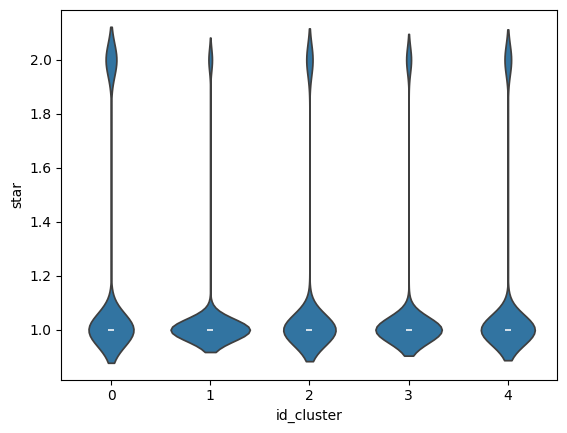

In [47]:
# Focus sur commentaires négatifs

negative_comments = df[df['sentiment'] == 'negatif']

tfidf_vectorizer = TfidfVectorizer(min_df=0.01, max_df=0.75, ngram_range=(1, 3), stop_words=stop_words_list)
vec_reponses_neg = tfidf_vectorizer.fit_transform(negative_comments.cleaned_lemma)

# Clustering
km_neg = KMeans(n_clusters=5, random_state=42)
km_neg.fit(vec_reponses_neg)

data_neg = pd.DataFrame({'star': negative_comments.star.values})
data_neg['id_cluster'] = km_neg.labels_

fig, ax = plt.subplots()
sns.violinplot(y="star", x="id_cluster", data=data_neg, ax=ax)
plt.show()


0    11345
1     2873
2     4274
3     4051
4     5204
Name: id_cluster, dtype: int64


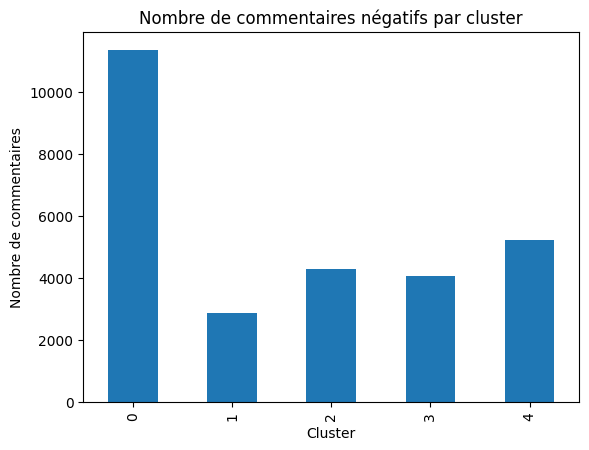

In [48]:
# Nb de commentaires par clusters négatifs

cluster_counts = data_neg['id_cluster'].value_counts()

cluster_counts = cluster_counts.sort_index()
print(cluster_counts)

cluster_counts.plot(kind='bar')
plt.title('Nombre de commentaires négatifs par cluster')
plt.xlabel('Cluster')
plt.ylabel('Nombre de commentaires')
plt.show()


In [49]:
# Importance relative des termes des clusters par rapport au corpus

tfidf_vectorizer = TfidfVectorizer(ngram_range=(3, 3))

tfidf_per_cluster_neg = {}

for cluster_num in range(5):
    documents_in_cluster = negative_comments[km_neg.labels_ == cluster_num].cleaned_lemma

    X_tfidf = tfidf_vectorizer.fit_transform(documents_in_cluster)

    scores = X_tfidf.toarray().mean(axis=0)
    terms = tfidf_vectorizer.get_feature_names_out()

    tfidf_per_cluster_neg[cluster_num] = pd.DataFrame(data=scores, index=terms, columns=["TF-IDF"])
    tfidf_per_cluster_neg[cluster_num] = tfidf_per_cluster_neg[cluster_num].sort_values(by="TF-IDF", ascending=False)

    print(f"Top terms for cluster {cluster_num} in negative comments:")
    print(tfidf_per_cluster_neg[cluster_num].head(10))
    print("\n")


Top terms for cluster 0 in negative comments:
                          TF-IDF
aucun geste commercial  0.000757
dernier fois commande   0.000725
service apres vent      0.000634
commande etre annuler   0.000612
livraison trop long     0.000530
bon achat euro          0.000510
payer frais livraison   0.000449
utiliser bon achat      0.000434
delai livraison trop    0.000415
vouloir rien savoir     0.000413


Top terms for cluster 1 in negative comments:
                            TF-IDF
site fnac com             0.002699
service client fnac       0.002069
fnac market place         0.001674
commande fnac com         0.001507
commande etre annuler     0.001369
appeler service client    0.001330
dernier fois commande     0.001258
carte cadeau fnac         0.001169
contacter service client  0.001126
appel service client      0.001124


Top terms for cluster 2 in negative comments:
                            TF-IDF
service client amazon     0.002101
colis etre livrer         0.001960
livre

Cluster 0: Service et livraison problématiques

---


Cluster 1: Soucis spécifiques à FNAC (site, service client)

---


Cluster 2: Problèmes de livraion (colis, service Amazon)

---


Cluster 3: Communication compliquée (service client par mail et téléphone)

---


Cluster 4: Abonnements CDiscount en cause

In [ ]:
# Embedding avec Word2vec et n-grammes

n_grams = ['service client', 'rapport_qualité_prix', 'sous_garantie', 'geste_commercial', 'delai_livraison', 'service_apres_vente', 'politique_retour', 'facilite_utilisation']
# underscores pour lier les mots dans les expressions (tokens qui ne seront pas divisés par le retrait des stopwords)
def replace_ngrams(text, n_grams):
    for n_gram in n_grams:
        text = text.replace(n_gram, n_gram.replace(' ', ''))
    return text

from gensim.models import Word2Vec

w2v_model = Word2Vec(window=2, min_count=2, vector_size=100, sg=0, sample=6e-5, negative=20)

sentences = [str(line).split() for line in df['cleaned']]
w2v_model.build_vocab(sentences, progress_per=10000)

df['cleaned_lemma'] = df['cleaned_lemma'].apply(lambda x: replace_ngrams(x, n_grams))